In [1]:
# Install any missing libraries
!pip install pandas scikit-learn matplotlib seaborn

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Loading in data

In [3]:
# Load the dataset
Illinois_2014 = pd.read_csv('/content/Dataset/Illinois_10_years_data.csv')
Illinois_2014.head()

,Year,Quarter,Month,Day_of_Month,Day_of_Week,Operating_Carrier_Code,Tail_Number,Origin_Airport_ID,Origin_Airport_Code,Origin_State_Name,...,Wind_Direction_Degrees,Wind_Speed_Knots,Hourly_Precipitation_Inches,Pressure_Altimeter_Inches,Sea_Level_Pressure_Millibar,Visibility_Miles,Sky_Cover_Level_1,Sky_Level_1_Altitude_Feet,Apparent_Temperature_Fahrenheit,Target
0,2014,2,4,1,2,AA,N359AA,13930,ORD,Illinois,...,260.0,15.0,0.0,30.0,1014.2,10.0,SCT,22000.0,40.28,0.0
1,2014,2,4,1,2,AA,N3ADAA,13930,ORD,Illinois,...,260.0,24.0,0.0,30.0,1008.9,10.0,SCT,2800.0,20.44,0.0
2,2014,2,4,1,2,AA,N3AKAA,13930,ORD,Illinois,...,220.0,15.0,0.0,30.0,1004.2,10.0,SCT,4300.0,55.04,0.0
3,2014,2,4,1,2,AA,N3AKAA,13930,ORD,Illinois,...,250.0,20.0,0.0,30.0,1011.5,10.0,OVC,2600.0,21.74,0.0
4,2014,2,4,1,2,AA,N3ANAA,13930,ORD,Illinois,...,220.0,15.0,0.0,30.0,1004.2,10.0,CLR,4700.0,55.26,0.0


# Ensuring clean data

In [12]:
# Ensure clean data
Illinois_2014_clean = Illinois_2014.dropna(subset=['Target'])

# Convert relevant categorical variables into numeric form using one-hot encoding
df_illinois_2014 = Illinois_2014_clean[(Illinois_2014_clean['Year'] == 2014)]

df_illinois_2014.head()


,Year,Quarter,Month,Day_of_Month,Day_of_Week,Operating_Carrier_Code,Tail_Number,Origin_Airport_ID,Origin_Airport_Code,Origin_State_Name,...,Wind_Direction_Degrees,Wind_Speed_Knots,Hourly_Precipitation_Inches,Pressure_Altimeter_Inches,Sea_Level_Pressure_Millibar,Visibility_Miles,Sky_Cover_Level_1,Sky_Level_1_Altitude_Feet,Apparent_Temperature_Fahrenheit,Target
0,2014,2,4,1,2,AA,N359AA,13930,ORD,Illinois,...,260.0,15.0,0.0,30.0,1014.2,10.0,SCT,22000.0,40.28,0.0
1,2014,2,4,1,2,AA,N3ADAA,13930,ORD,Illinois,...,260.0,24.0,0.0,30.0,1008.9,10.0,SCT,2800.0,20.44,0.0
2,2014,2,4,1,2,AA,N3AKAA,13930,ORD,Illinois,...,220.0,15.0,0.0,30.0,1004.2,10.0,SCT,4300.0,55.04,0.0
3,2014,2,4,1,2,AA,N3AKAA,13930,ORD,Illinois,...,250.0,20.0,0.0,30.0,1011.5,10.0,OVC,2600.0,21.74,0.0
4,2014,2,4,1,2,AA,N3ANAA,13930,ORD,Illinois,...,220.0,15.0,0.0,30.0,1004.2,10.0,CLR,4700.0,55.26,0.0


# Exploratory Data Analysis (EDA)

## Summary Statistics


In [36]:
Illinois_2014.describe()

,Year,Quarter,Month,Day_of_Month,Day_of_Week,Origin_Airport_ID,Scheduled_Departure_Time,Departure_Delay_Minutes,Taxi_Out_Time_Minutes,Flight_Distance_Miles,...,Relative_Humidity_Percent,Wind_Direction_Degrees,Wind_Speed_Knots,Hourly_Precipitation_Inches,Pressure_Altimeter_Inches,Sea_Level_Pressure_Millibar,Visibility_Miles,Sky_Level_1_Altitude_Feet,Apparent_Temperature_Fahrenheit,Target
count,132592.0,132592.000000,132592.000000,132592.000000,132592.000000,132592.000000,132592.000000,132592.000000,132592.000000,132592.000000,...,132591.000000,132591.000000,132591.000000,132591.000000,132591.000000,132591.000000,132591.000000,132591.000000,132591.000000,132591.000000
mean,2014.0,2.418389,6.145499,14.762791,3.925410,13727.945321,1363.000649,17.632663,17.091763,724.683812,...,66.735048,194.425338,8.806367,0.005142,29.994743,1017.173475,8.771911,8213.919497,37.565573,0.306529
std,0.0,1.122270,3.926992,8.407225,1.968541,456.833887,457.741465,40.610430,10.390990,507.200598,...,15.944817,100.469701,4.507741,0.036954,0.185437,8.366476,2.506992,8249.277091,27.757189,0.461054
min,2014.0,1.000000,1.000000,1.000000,1.000000,10685.000000,500.000000,-55.000000,1.000000,67.000000,...,14.870000,0.000000,0.000000,0.000000,29.000000,991.600000,0.105000,100.000000,-43.110000,0.000000
25%,2014.0,1.000000,2.000000,8.000000,2.000000,13367.000000,945.000000,-3.000000,11.000000,334.000000,...,55.640000,110.000000,6.000000,0.000000,30.000000,1012.000000,9.250000,1900.000000,16.800000,0.000000
50%,2014.0,2.000000,4.000000,14.000000,4.000000,13930.000000,1339.000000,2.000000,15.000000,606.000000,...,68.440000,210.000000,8.000000,0.000000,30.000000,1017.400000,10.000000,4400.000000,33.660000,0.000000
75%,2014.0,3.000000,8.000000,22.000000,6.000000,13930.000000,1750.000000,21.000000,20.000000,925.000000,...,78.660000,270.000000,11.000000,0.000000,30.000000,1023.300000,10.000000,12800.000000,64.260000,1.000000
max,2014.0,4.000000,12.000000,31.000000,7.000000,14952.000000,2300.000000,1149.000000,168.000000,4243.000000,...,100.000000,360.000000,31.000000,1.635000,31.000000,1040.200000,10.000000,35000.000000,108.900000,1.000000


## Distribution of Numerical Features


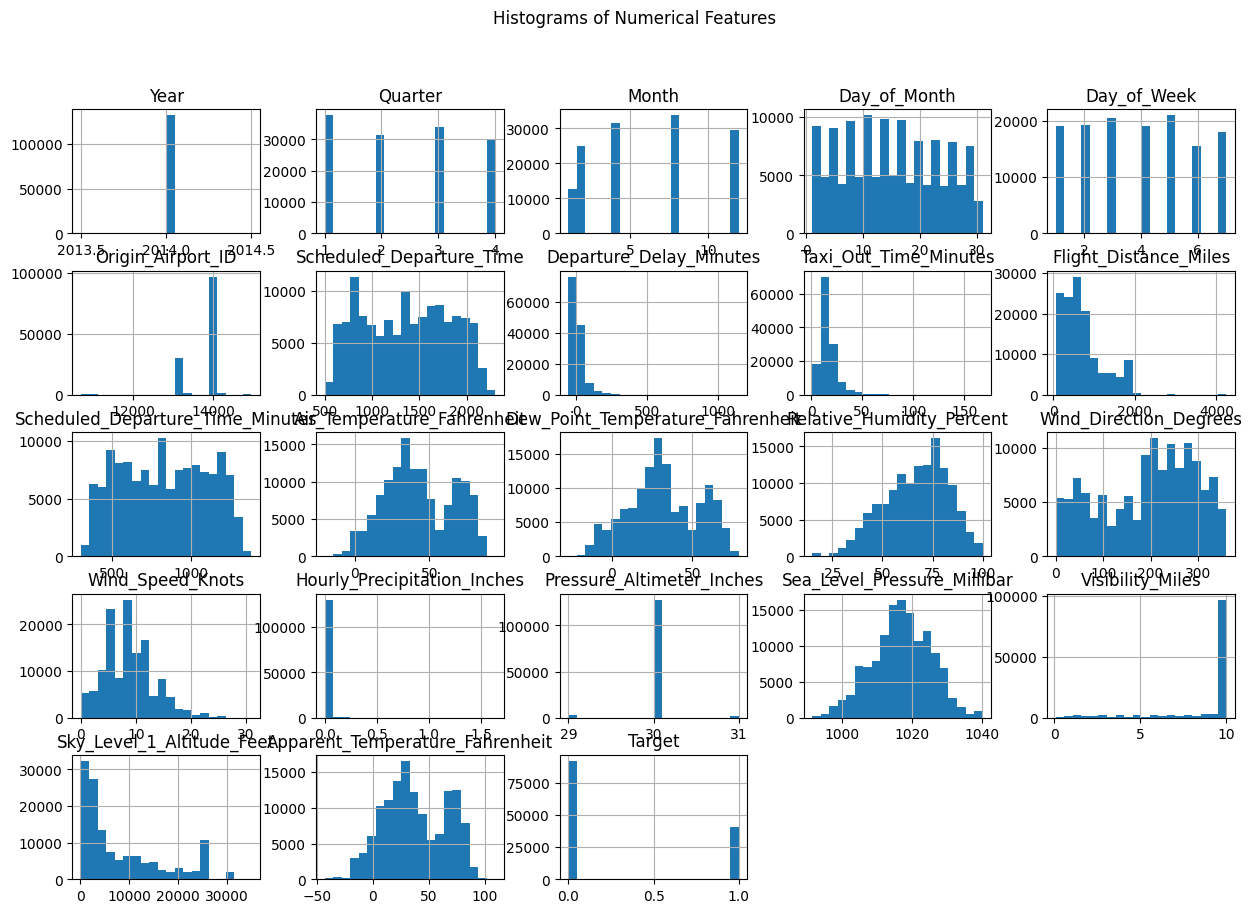

In [37]:
Illinois_2014.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

## Box Plots for Outlier Detection

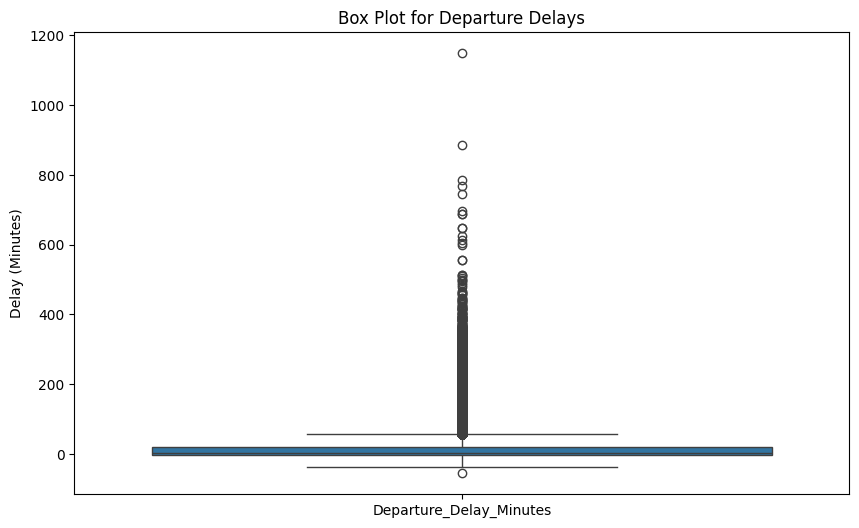

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=Illinois_2014[['Departure_Delay_Minutes']])  # Replace with numerical columns of interest
plt.title('Box Plot for Departure Delays')
plt.ylabel('Delay (Minutes)')
plt.show()

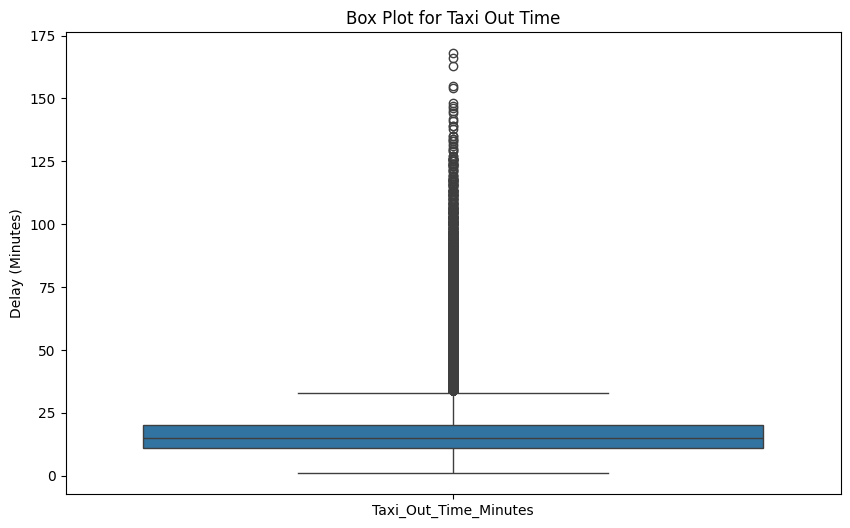

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=Illinois_2014[['Taxi_Out_Time_Minutes']])  # Replace with numerical columns of interest
plt.title('Box Plot for Taxi Out Time')
plt.ylabel('Delay (Minutes)')
plt.show()

## Relationship Between Categorical Variables and Target

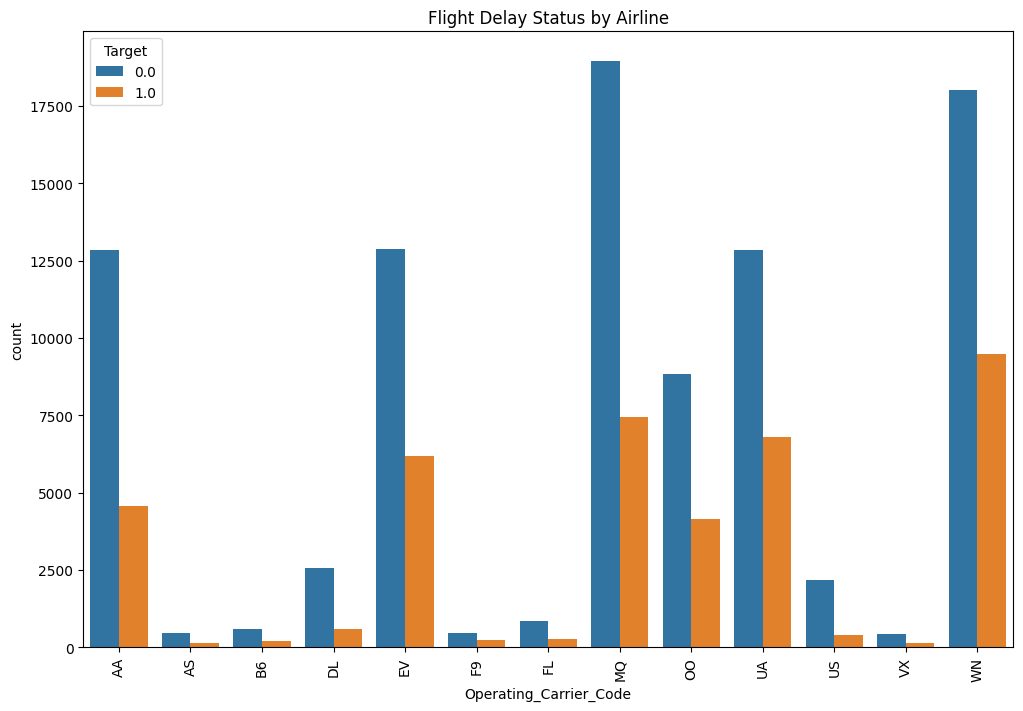

In [42]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Operating_Carrier_Code', hue='Target', data=Illinois_2014)
plt.title('Flight Delay Status by Airline')
plt.xticks(rotation=90)
plt.show()

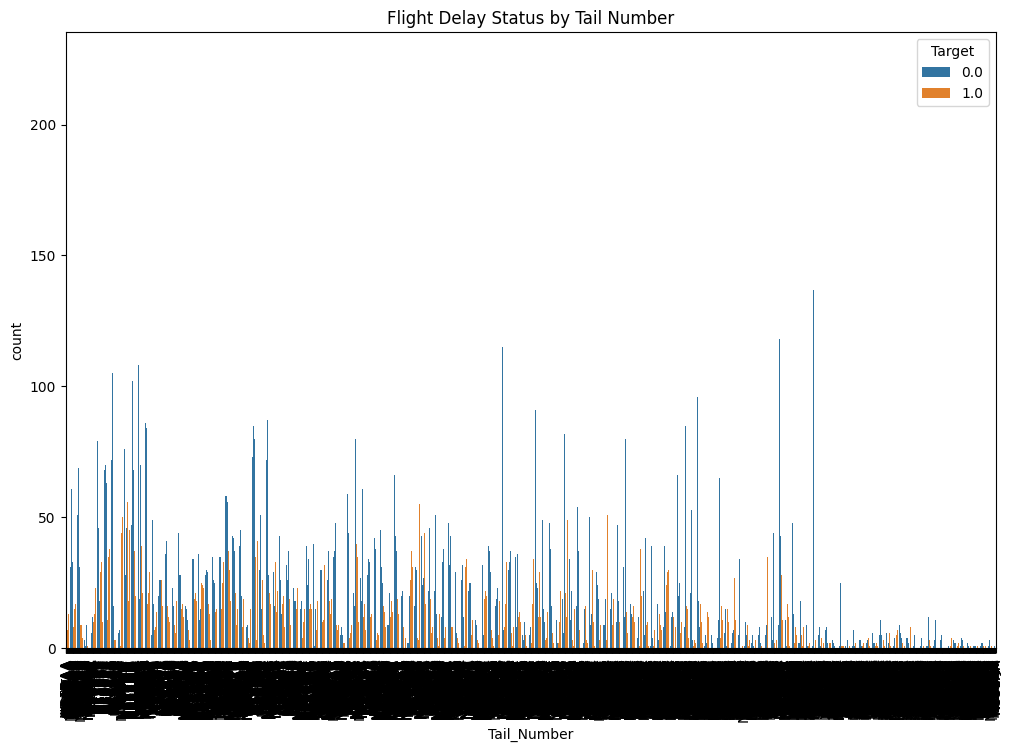

In [46]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Tail_Number', hue='Target', data=Illinois_2014)
plt.title('Flight Delay Status by Tail Number')
plt.xticks(rotation=90)
plt.show()

## Pairwise Plots

## Class Distribution (Delayed vs. Not Delayed)


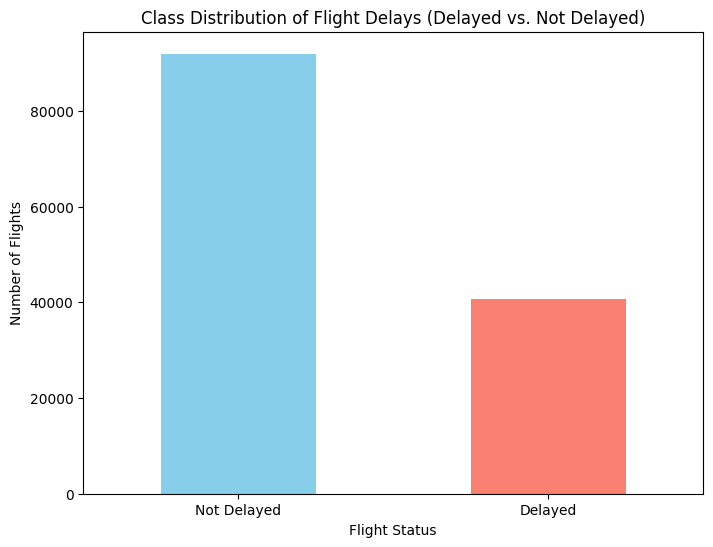

In [18]:
# Calculate class distribution
class_distribution = Illinois_2014['Target'].value_counts()
class_distribution.index = ['Not Delayed', 'Delayed']  # Label the classes

# Plot the distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution of Flight Delays (Delayed vs. Not Delayed)')
plt.xlabel('Flight Status')
plt.ylabel('Number of Flights')
plt.xticks(rotation=0)
plt.show()

## Visualizing the distribution of departure delays

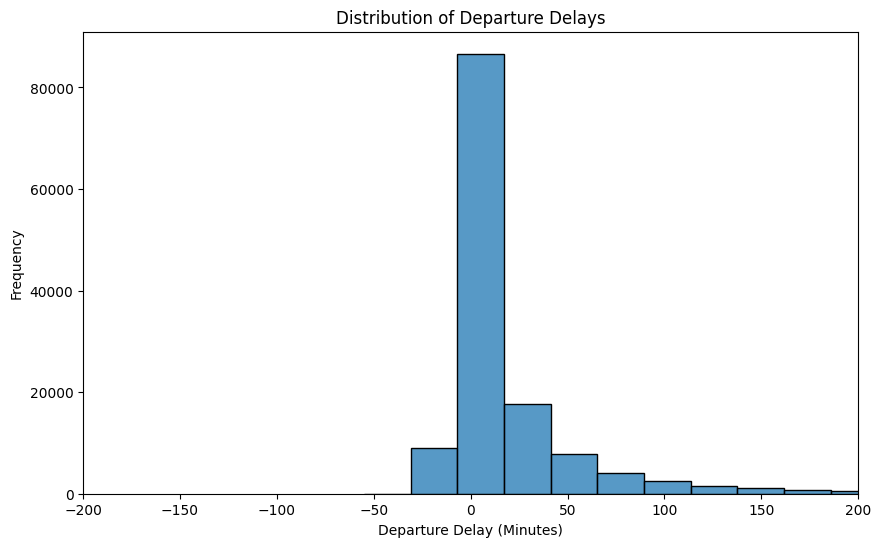

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(df_illinois_2014['Departure_Delay_Minutes'].dropna(), bins=50)
plt.title('Distribution of Departure Delays')
plt.xlabel('Departure Delay (Minutes)')
plt.ylabel('Frequency')

plt.xlim(-200, 200)

plt.show()

## Visualizing the relationship between Various predictor variables



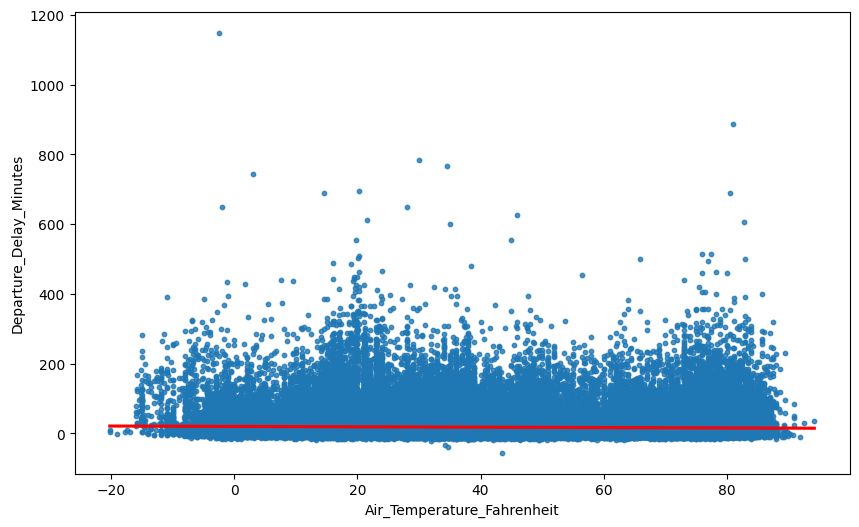

In [32]:
plt.figure(figsize=(10,6))
sns.regplot(x='Air_Temperature_Fahrenheit', y='Departure_Delay_Minutes', data=df_illinois_2014, scatter_kws={'s':10}, line_kws={"color": "red"})
plt.show()

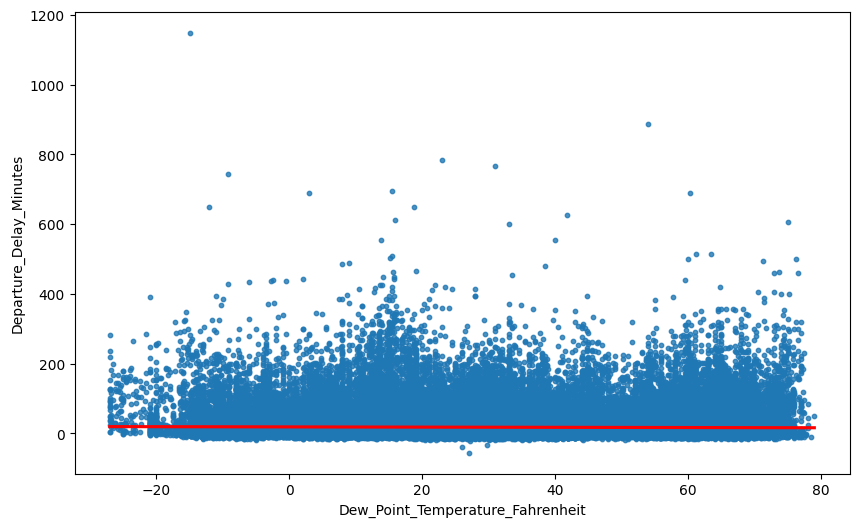

In [33]:
plt.figure(figsize=(10,6))
sns.regplot(x='Dew_Point_Temperature_Fahrenheit', y='Departure_Delay_Minutes', data=df_illinois_2014, scatter_kws={'s':10}, line_kws={"color": "red"})
plt.show()

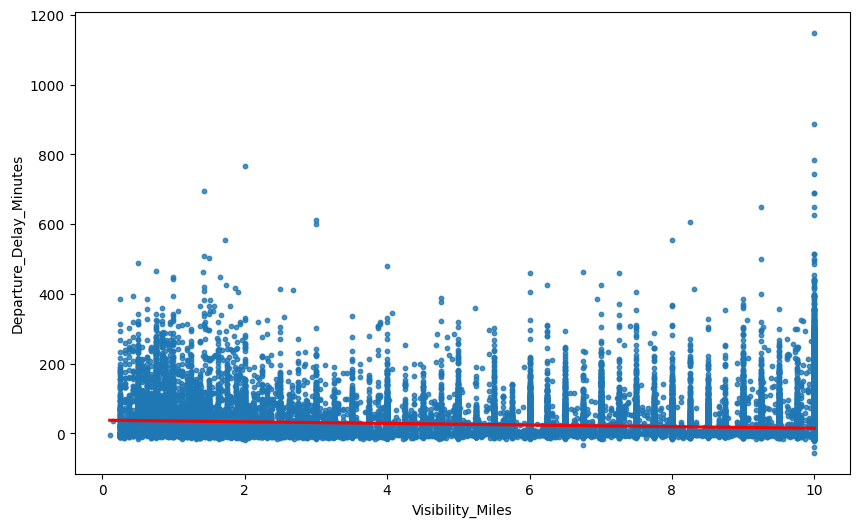

In [35]:
plt.figure(figsize=(10,6))
sns.regplot(x='Visibility_Miles', y='Departure_Delay_Minutes', data=df_illinois_2014, scatter_kws={'s':10}, line_kws={"color": "red"})
plt.show()

## Creation of Correlation Matrix to check multicollinearity between weather variables


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Import pandas for data manipulation

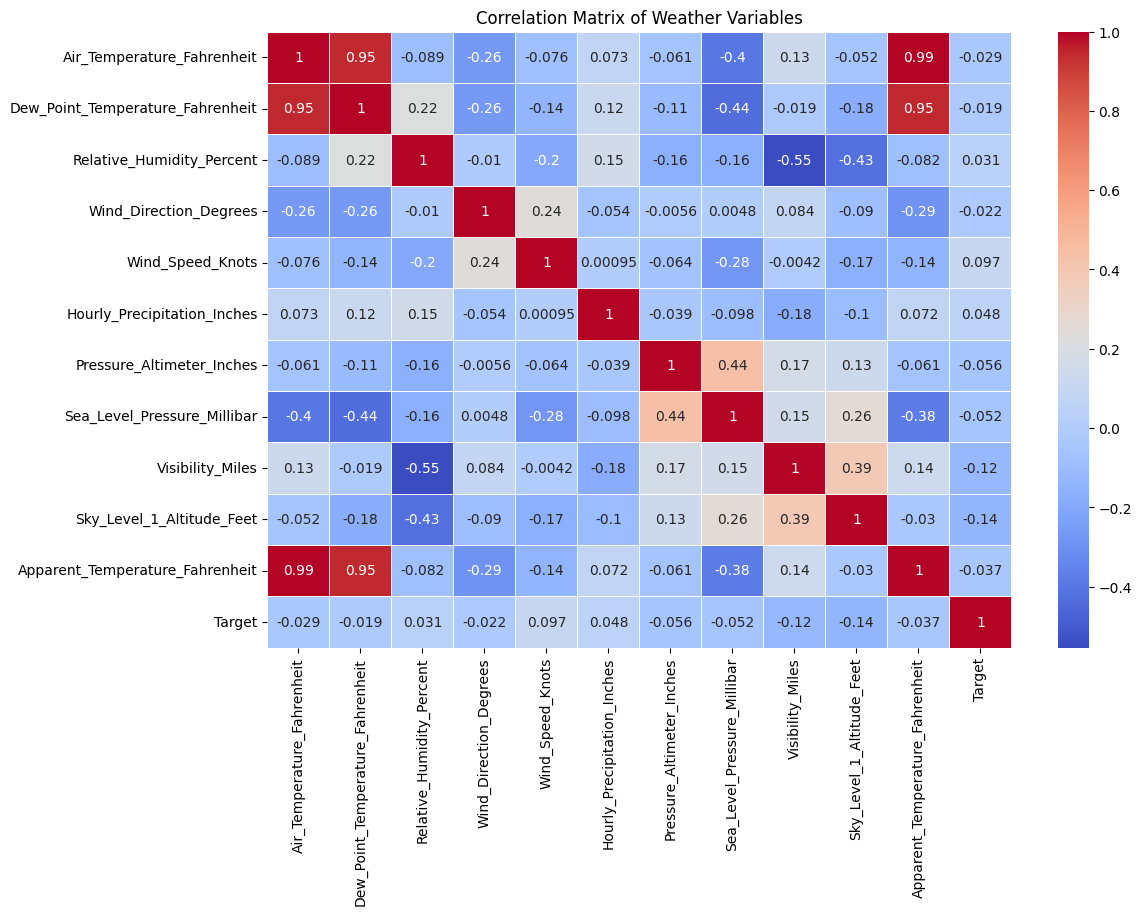

In [28]:
plt.figure(figsize=(12,8))
correlation_matrix = df_illinois_2014[['Air_Temperature_Fahrenheit', 'Dew_Point_Temperature_Fahrenheit', 'Relative_Humidity_Percent', 'Wind_Direction_Degrees', 'Wind_Speed_Knots', 'Hourly_Precipitation_Inches', 'Pressure_Altimeter_Inches', 'Sea_Level_Pressure_Millibar', 'Visibility_Miles', 'Sky_Level_1_Altitude_Feet', 'Apparent_Temperature_Fahrenheit', 'Target']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Weather Variables')
plt.show()

## Creation of Correlation Matrix to check multicollinearity between weather variables


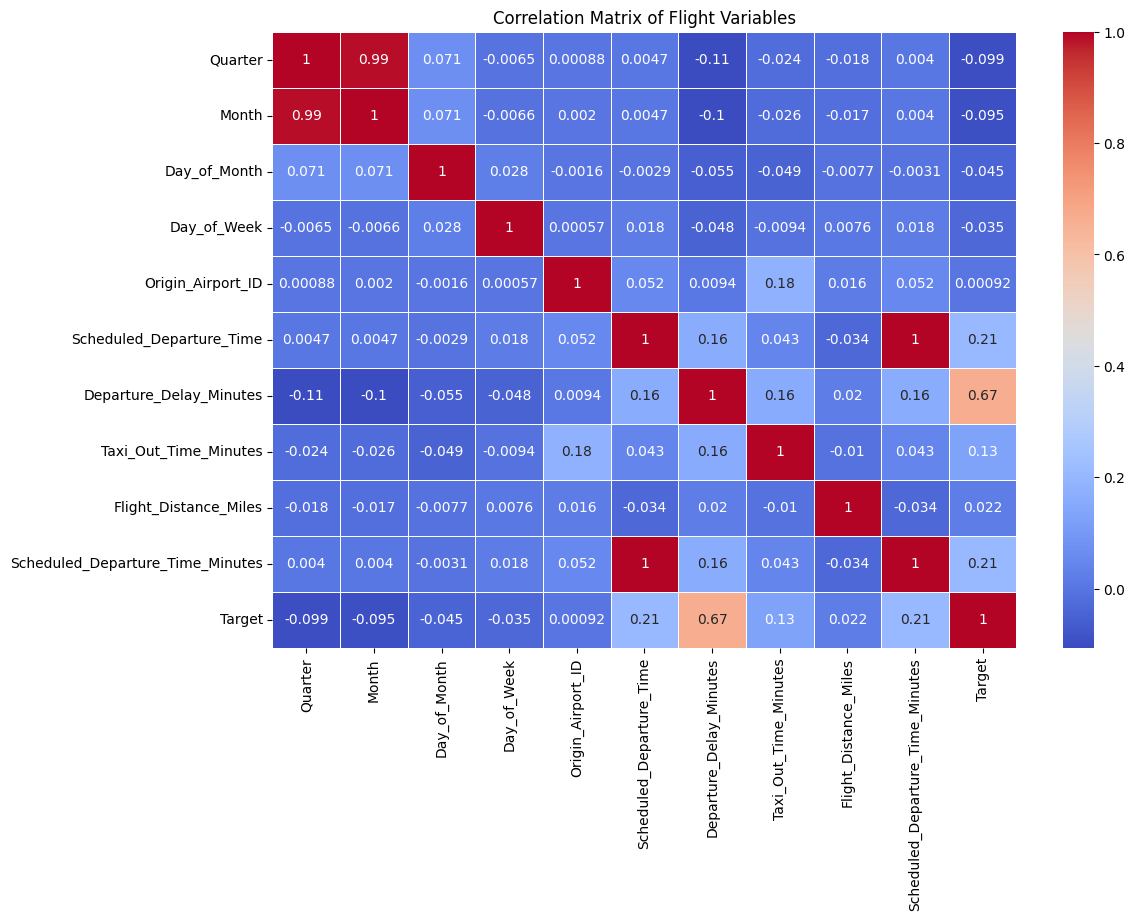

In [29]:
plt.figure(figsize=(12,8))
correlation_matrix = df_illinois_2014[['Quarter', 'Month', 'Day_of_Month', 'Day_of_Week', 'Origin_Airport_ID', 'Scheduled_Departure_Time', 'Departure_Delay_Minutes', 'Taxi_Out_Time_Minutes', 'Flight_Distance_Miles', 'Scheduled_Departure_Time_Minutes', 'Target']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Flight Variables')
plt.show()

## Splitting Data into Training and Testing sets

## Training a basic regression model to predict departure delay using weather data

## Predictions and performance evaluation

## Evaluation Metrics

## Visualizing Predicted Values vs. Actual Values